In [1]:
#Calling visualization modules
import matplotlib.pyplot as plt

#Calling numpy and pandas 
import pandas as pd
import numpy as np

#Calling matrix for model evaluation
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score,classification_report

#Callling traing split library
from sklearn.model_selection import train_test_split

#Importing ML algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Calling SMOTE library
import imblearn
#Importing hyperparameter
import xgboost as xgb
import lightgbm as lgb 
#Hyperparameter tuning Cross validation ML library
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#importing scikit-optimization library
from skopt import BayesSearchCV

<a id="3"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">LOADING DATASETS</div>

In [2]:
data=pd.read_csv("/kaggle/input/fraud-detection-bank-dataset-20k-records-binary/fraud_detection_bank_dataset.csv")

<a id="4"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">DATA EXPLORATION </div>

In [3]:
#checking the data
data.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


In [4]:
#checking the data shape
data.shape

(20468, 114)

In [5]:
#seperating the fraud and no fraud data
no_fraud=data[(data["targets"]==0)]
fraud=data[data["targets"]==1]


In [6]:
#checking the shape fraud data
fraud.shape

(5438, 114)

In [7]:
#checking the no-fraud data shape
no_fraud.shape

(15030, 114)

In [8]:
#verifying data null
data.isnull().sum().sum()

0

In [9]:
#Verifying the NAN
data.isna().sum().sum()

0

In [10]:
#Checking the unique
data.nunique().sum()

43797

In [11]:
#checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Columns: 114 entries, Unnamed: 0 to targets
dtypes: float64(1), int64(113)
memory usage: 17.8 MB


In [12]:
#dataset for ML algo
df=data.copy()

In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]


In [14]:
def plot_roc_curve(y_test,prob):
  #Takes actual and predicted probablities as a input and plot receiver operating chracteritics 

  fpr, tpr, threshold=roc_curve(y_test, prob)
  plt.title("ROC curve plot")
  plt.plot(fpr,tpr, 'b', label="curve measure")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.legend()
  plt.show()


<h2 style="color:#0D8D39 ;font-size: 19px "><b> Implemented model performance score function

In [15]:
def model_evaluation(test, pred):
  print("model accuracy: \n", accuracy_score(test, pred))
  print("Confusion metrix: \n", confusion_matrix(test, pred))
  print("classification report: \n", classification_report(test,pred))

<h2 style="color:#0D8D39 ;font-size: 19px "><b>With out sampling of imblance data

In [16]:
#Splitting train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [17]:
#Initializing KNeighbors object
kns=KNeighborsClassifier(n_neighbors=20)

#Training the train data
kns.fit(X_train,np.ravel(y_train))
#Getting prediction value
pred=kns.predict(X_test)


In [18]:
#Calling model evaluation function
model_evaluation(y_test,pred)

model accuracy: 
 0.9894469415673246
Confusion metrix: 
 [[3798    2]
 [  52 1265]]
classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3800
           1       1.00      0.96      0.98      1317

    accuracy                           0.99      5117
   macro avg       0.99      0.98      0.99      5117
weighted avg       0.99      0.99      0.99      5117



In [19]:
#Calculating the probablity 
kns_prob=kns.predict_proba(X_test)[:,1]

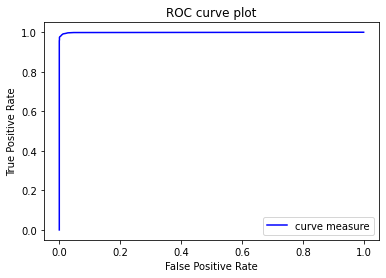

In [20]:
#Visualizing the roc
plot_roc_curve(y_test,kns_prob)

<h2 style="color:#0D8D39 ;font-size: 19px "><b>Applying SMOTE over sampling 

In [21]:
#Creating over_sampling object
over_smpl=imblearn.over_sampling.SMOTE()

In [22]:
#Sampling the imblance data
X_res, y_res=over_smpl.fit_resample(X,y)

In [23]:
#splitting the train and test data
X_train,X_test,y_train,y_test=train_test_split(X_res, y_res)

In [24]:
#Initializing object
kn=KNeighborsClassifier(n_neighbors=10)

In [25]:
#Training the model
kn.fit(X_train,np.ravel(y_train))

KNeighborsClassifier(n_neighbors=10)

In [26]:
#predicting the model
y_pred=kn.predict(X_test)


In [27]:
#Calling model evaluation function
model_evaluation(y_test,y_pred)

model accuracy: 
 0.9926813040585496
Confusion metrix: 
 [[3704   14]
 [  41 3756]]
classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3718
           1       1.00      0.99      0.99      3797

    accuracy                           0.99      7515
   macro avg       0.99      0.99      0.99      7515
weighted avg       0.99      0.99      0.99      7515



After doing over sampling on imblance data, we got better performance to 99%

In [28]:
#performance matrix roc
y_predroc=kn.predict_proba(X_test)[:,1]
y_predroc

array([0., 1., 1., ..., 0., 0., 0.])

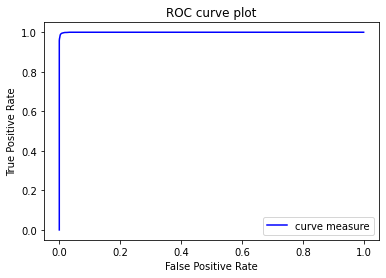

In [29]:
#calling roc_curve plot
plot_roc_curve(y_test,y_predroc)


<a id="4"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Implementing DecisionTree classifier </div>

In [30]:
#creating Decision tree object
clf=DecisionTreeClassifier()

In [31]:
#Training the model
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
#Predict the model
pred=clf.predict(X_test)

In [33]:
#model performance
model_evaluation(y_test,pred)

model accuracy: 
 1.0
Confusion metrix: 
 [[3718    0]
 [   0 3797]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3718
           1       1.00      1.00      1.00      3797

    accuracy                           1.00      7515
   macro avg       1.00      1.00      1.00      7515
weighted avg       1.00      1.00      1.00      7515



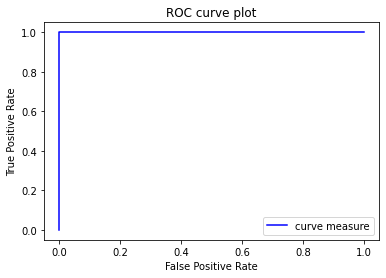

In [34]:
#Roc curve for checking model performance
plot_roc_curve(y_test, clf.predict_proba(X_test)[:,1])

<a id="4"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Applying RandomForestClassifier for fraud detection </div>

In [35]:
#Creating RFC object
rft=RandomForestClassifier(n_estimators=100)

In [36]:
#Training the model
rft.fit(X_train, np.ravel(y_train))

RandomForestClassifier()

In [37]:
#predict the model
y_pred=rft.predict(X_test)
y_roc_pred=rft.predict_proba(X_test)[:,1]

In [38]:
#Model performance
model_evaluation(y_test, y_pred)

model accuracy: 
 1.0
Confusion metrix: 
 [[3718    0]
 [   0 3797]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3718
           1       1.00      1.00      1.00      3797

    accuracy                           1.00      7515
   macro avg       1.00      1.00      1.00      7515
weighted avg       1.00      1.00      1.00      7515



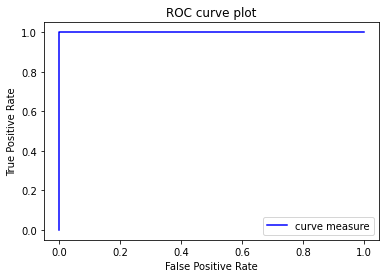

In [39]:
#Plotting the curve
plot_roc_curve(y_test,y_roc_pred)

<a id="5"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">GradientBosting implemention for fraud detection</div> 

In [40]:
#Creating Gradient boosting object
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10)

In [41]:
#Training the model
gbc.fit(X_train,np.ravel(y_train))

GradientBoostingClassifier(learning_rate=1.0, max_depth=10)

In [42]:
#predicting the model
pred=gbc.predict(X_test)
roc_pred=gbc.predict_proba(X_test)[:,1]

In [43]:
#Model performance
model_evaluation(y_test,pred)

model accuracy: 
 1.0
Confusion metrix: 
 [[3718    0]
 [   0 3797]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3718
           1       1.00      1.00      1.00      3797

    accuracy                           1.00      7515
   macro avg       1.00      1.00      1.00      7515
weighted avg       1.00      1.00      1.00      7515



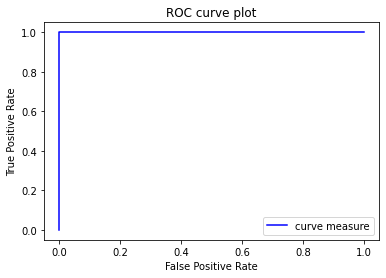

In [44]:
#Ploting curve
plot_roc_curve(y_test,roc_pred)

<h2 style="color:#0D8D39 ;font-size: 19px "><b>Xgboost implementation to detect fraud

In [45]:
#Initializing xgb hyperparameter
params={'learning_rate':[0.01, 0.1],
        'max_depth':[2,5],
        'min_child_weight':[1,3,5],
        'subsample':[.5, .7],
        'n_estimators':[100,150]}

In [46]:
#XGB object initialization
xgb_clf=xgb.XGBClassifier()

In [47]:
#GridSearchCV object creation 
gcv=GridSearchCV(estimator=xgb_clf, param_grid=params, cv=2, verbose=1)

In [48]:
#Training the model
gcv.fit(X_train,y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [49]:
#Prediction
g_pred=gcv.predict(X_test)
g_roc_pred=gcv.predict_proba(X_test)[:,1]

In [50]:
#Best Score
gcv.best_score_

0.9999112924687306

In [51]:
#Model performance score
model_evaluation(y_test,g_pred)

model accuracy: 
 1.0
Confusion metrix: 
 [[3718    0]
 [   0 3797]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3718
           1       1.00      1.00      1.00      3797

    accuracy                           1.00      7515
   macro avg       1.00      1.00      1.00      7515
weighted avg       1.00      1.00      1.00      7515



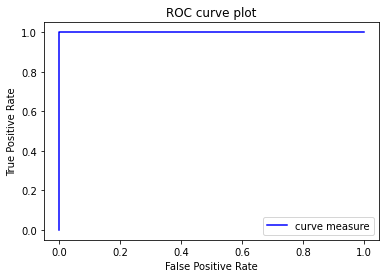

In [52]:
#Visualizing the model performance
plot_roc_curve(y_test,g_roc_pred)


<a id="3"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">Applying lightgbm & Randomized Search for fraud detection</div>

In [53]:
#Lightgbm object
LGB=lgb.LGBMClassifier()

In [54]:
#Parameter initialization
rs_params = {
        'bagging_fraction': (0.5, 0.8),
        'bagging_frequency': (5, 8),
        'feature_fraction': (0.5, 0.8),
        'max_depth': (10, 13),
        'min_data_in_leaf': (90, 120),
        'num_leaves': (1200, 1550),
        'learning_rate': (0.01, 1.0)
}

In [55]:
#Ramdomized object 
rs_cv=RandomizedSearchCV(estimator=LGB, param_distributions=rs_params, cv=2, n_jobs=-1, verbose=1)

In [56]:
# Change columns names ([LightGBM] Do not support special JSON characters in feature name.)
import re
new_names = {col: re.sub(r'[^A-Za-z0-9_]+', '', col) for col in X_train.columns}
new_n_list = list(new_names.values())
# [LightGBM] Feature appears more than one time.
new_names = {col: f'{new_col}_{i}' if new_col in new_n_list[:i] else new_col for i, (col, new_col) in enumerate(new_names.items())}
X_train = X_train.rename(columns=new_names)

In [57]:
#Train the model
rs_cv.fit(X_train,np.ravel(y_train))

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


RandomizedSearchCV(cv=2, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'bagging_fraction': (0.5, 0.8),
                                        'bagging_frequency': (5, 8),
                                        'feature_fraction': (0.5, 0.8),
                                        'learning_rate': (0.01, 1.0),
                                        'max_depth': (10, 13),
                                        'min_data_in_leaf': (90, 120),
                                        'num_leaves': (1200, 1550)},
                   verbose=1)

In [58]:
#prediction
rs_pred=rs_cv.predict(X_test)
rs_roc_pred=rs_cv.predict_proba(X_test)[:,1]

In [59]:
#Score
rs_cv.best_score_

0.9998669387030958

In [60]:
#Model performance score
model_evaluation(y_test,rs_pred)

model accuracy: 
 1.0
Confusion metrix: 
 [[3718    0]
 [   0 3797]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3718
           1       1.00      1.00      1.00      3797

    accuracy                           1.00      7515
   macro avg       1.00      1.00      1.00      7515
weighted avg       1.00      1.00      1.00      7515



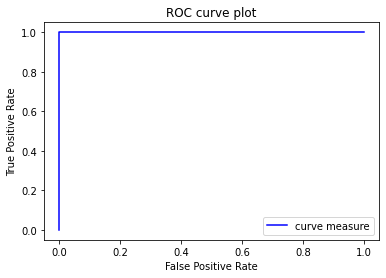

In [61]:
#Roc plot
plot_roc_curve(y_test,rs_roc_pred )


<a id="3"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">Bayes Search for Fraud Detection</div>

In [62]:
#Bayes Search parameter
bs_params={
       'max_depth':[4,6],
       'n_estimators':[50, 100],
       'learning_rate':[0.1, 0.2]
}

In [63]:
#BayesSearch object 
bs=BayesSearchCV(LGB,
                 bs_params,
                 n_iter=5,
                 scoring='roc_auc',
                 cv=2,
                 refit=True,
                 verbose=1)

In [64]:
#Training the model
bs.fit(X_train,np.ravel(y_train))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


BayesSearchCV(cv=2, estimator=LGBMClassifier(), n_iter=5, scoring='roc_auc',
              search_spaces={'learning_rate': [0.1, 0.2], 'max_depth': [4, 6],
                             'n_estimators': [50, 100]},
              verbose=1)

In [65]:
#Score measuring
bs.best_score_

0.9999998268793537

In [66]:
#Model prediction
gb_pred=bs.predict(X_test)
gb_roc_prob=bs.predict_proba(X_test)[:,1]

model accuracy: 
 1.0
Confusion metrix: 
 [[3718    0]
 [   0 3797]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3718
           1       1.00      1.00      1.00      3797

    accuracy                           1.00      7515
   macro avg       1.00      1.00      1.00      7515
weighted avg       1.00      1.00      1.00      7515



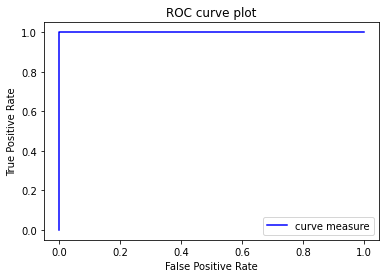

In [67]:
#Model performance measure
model_evaluation(y_test, gb_pred)
plot_roc_curve(y_test,gb_roc_prob)